# Ensemble Techniques
### Domain: Banking 
### Author: Abhinav Tyagi 

## Context:
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of
customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a
new product.

## Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to
assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed

## Objective:
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Import the necessary libraries and read the data as a data frame (2 marks)


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
# Machine Learning Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics

## 2. Perform basic EDA which should include the following and print out your insights at every step. (20marks)

## a. Shape and data type of the data (1 marks)

In [7]:
bank_df = pd.read_csv('Bank-full.csv')
bank_df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [8]:
rows,columns=bank_df.shape
print("Rows =",rows,"Columns =",columns)

Rows = 45211 Columns = 17


## b. Check info of the dataset (1 marks)

In [9]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [10]:
#convert to numbers
bank_df['Target'] = bank_df['Target'].map({'yes': 1, 'no': 0})
bank_df['default'] = bank_df['default'].map({'yes': 1, 'no': 0})
bank_df['housing'] = bank_df['housing'].map({'yes': 1, 'no': 0})
bank_df['loan'] = bank_df['loan'].map({'yes': 1, 'no': 0})

In [11]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target        int64
dtype: object

## Report statistical summary of the dataset. (3 marks)

In [12]:
bank_df.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
default   45211.0     0.018027     0.133049     0.0    0.0    0.0     0.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
housing   45211.0     0.555838     0.496878     0.0    0.0    1.0     1.0   
loan      45211.0     0.160226     0.366820     0.0    0.0    0.0     0.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   
Target    45211.0     0.116985     0.321406     0.0    0.0    0.0     0.0   

               max  
age           95.0  
default        1.0  
balance   102127.0  
housing        1.0  
loan           1.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0  
Target         1.0

## d. Check the presence of missing values and impute if there is any (3 marks)

In [13]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

No presence of missing values in any column 

## e. Checking the presence of outliers and impute if there is any (3 marks)

<AxesSubplot:>

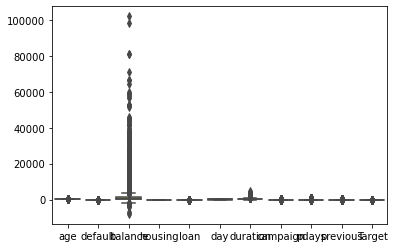

In [17]:
sns.boxplot(data=bank_df)

<AxesSubplot:xlabel='balance'>

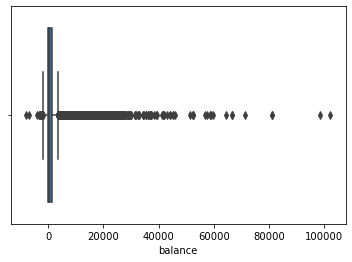

In [19]:
sns.boxplot(bank_df.balance)

<AxesSubplot:>

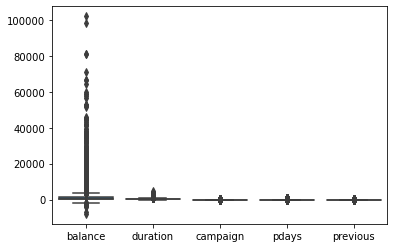

In [67]:
bank_df_num_cols=['balance', 'duration','campaign', 'pdays', 'previous']
sns.boxplot(data=bank_df[bank_df_num_cols])

It make sense to me that Balance can go high in the bank account, It should not be treated as an outlier as we can see no other columns have any outlier.

## f. Report the distribution of independent variables. (2 marks)

In [21]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='Density'>

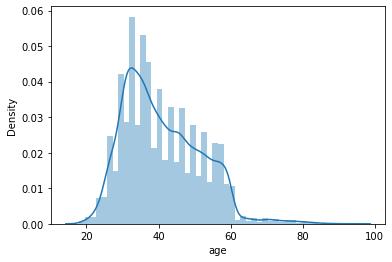

In [39]:
sns.distplot(bank_df.age)

<AxesSubplot:xlabel='default', ylabel='Density'>

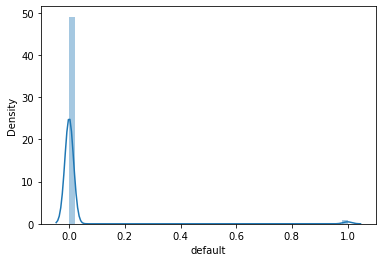

In [41]:
sns.distplot(bank_df.default)

<AxesSubplot:xlabel='balance', ylabel='Density'>

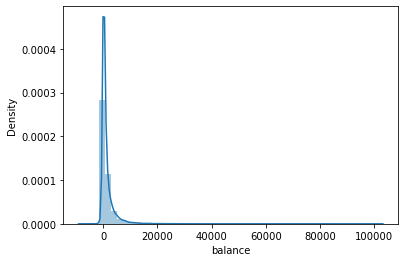

In [42]:
sns.distplot(bank_df.balance)

<AxesSubplot:xlabel='housing', ylabel='Density'>

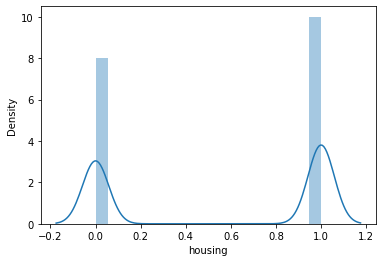

In [43]:
sns.distplot(bank_df.housing)

<AxesSubplot:xlabel='loan', ylabel='Density'>

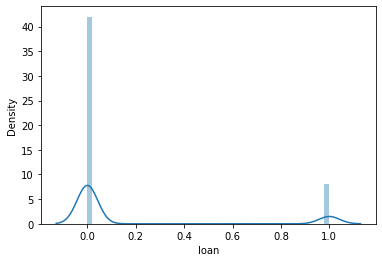

In [44]:
sns.distplot(bank_df.loan)

<AxesSubplot:xlabel='duration', ylabel='Density'>

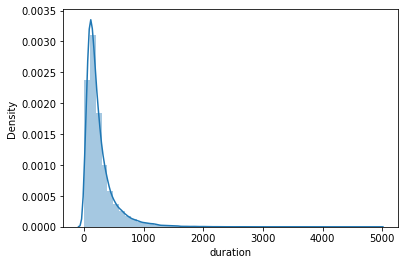

In [46]:
sns.distplot(bank_df.duration)

<AxesSubplot:xlabel='campaign', ylabel='Density'>

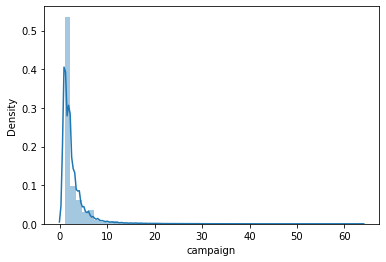

In [47]:
sns.distplot(bank_df.campaign)

<AxesSubplot:xlabel='pdays', ylabel='Density'>

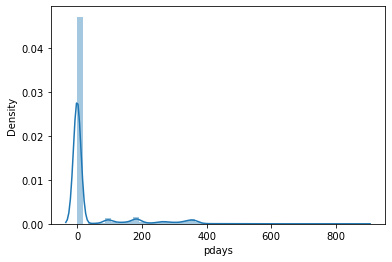

In [48]:
sns.distplot(bank_df.pdays)

<AxesSubplot:xlabel='previous', ylabel='Density'>

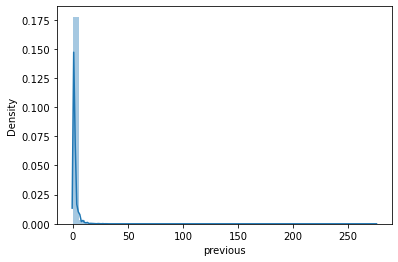

In [49]:
sns.distplot(bank_df.previous)

## g. Check frequency distribution of target feature and comment on your findings. (2 marks)

In [53]:
bank_df.groupby(['Target']).count()

age    job  marital  education  default  balance  housing   loan  \
Target                                                                       
0       39922  39922    39922      39922    39922    39922    39922  39922   
1        5289   5289     5289       5289     5289     5289     5289   5289   

        contact    day  month  duration  campaign  pdays  previous  poutcome  
Target                                                                        
0         39922  39922  39922     39922     39922  39922     39922     39922  
1          5289   5289   5289      5289      5289   5289      5289      5289

Ratio of 0 : 1 == 0.8830151954170445: 0.1169848045829555 (0.883 : 0.117)

## h. Perform bivariate analysis using pairplot and mention your findings. (3 marks

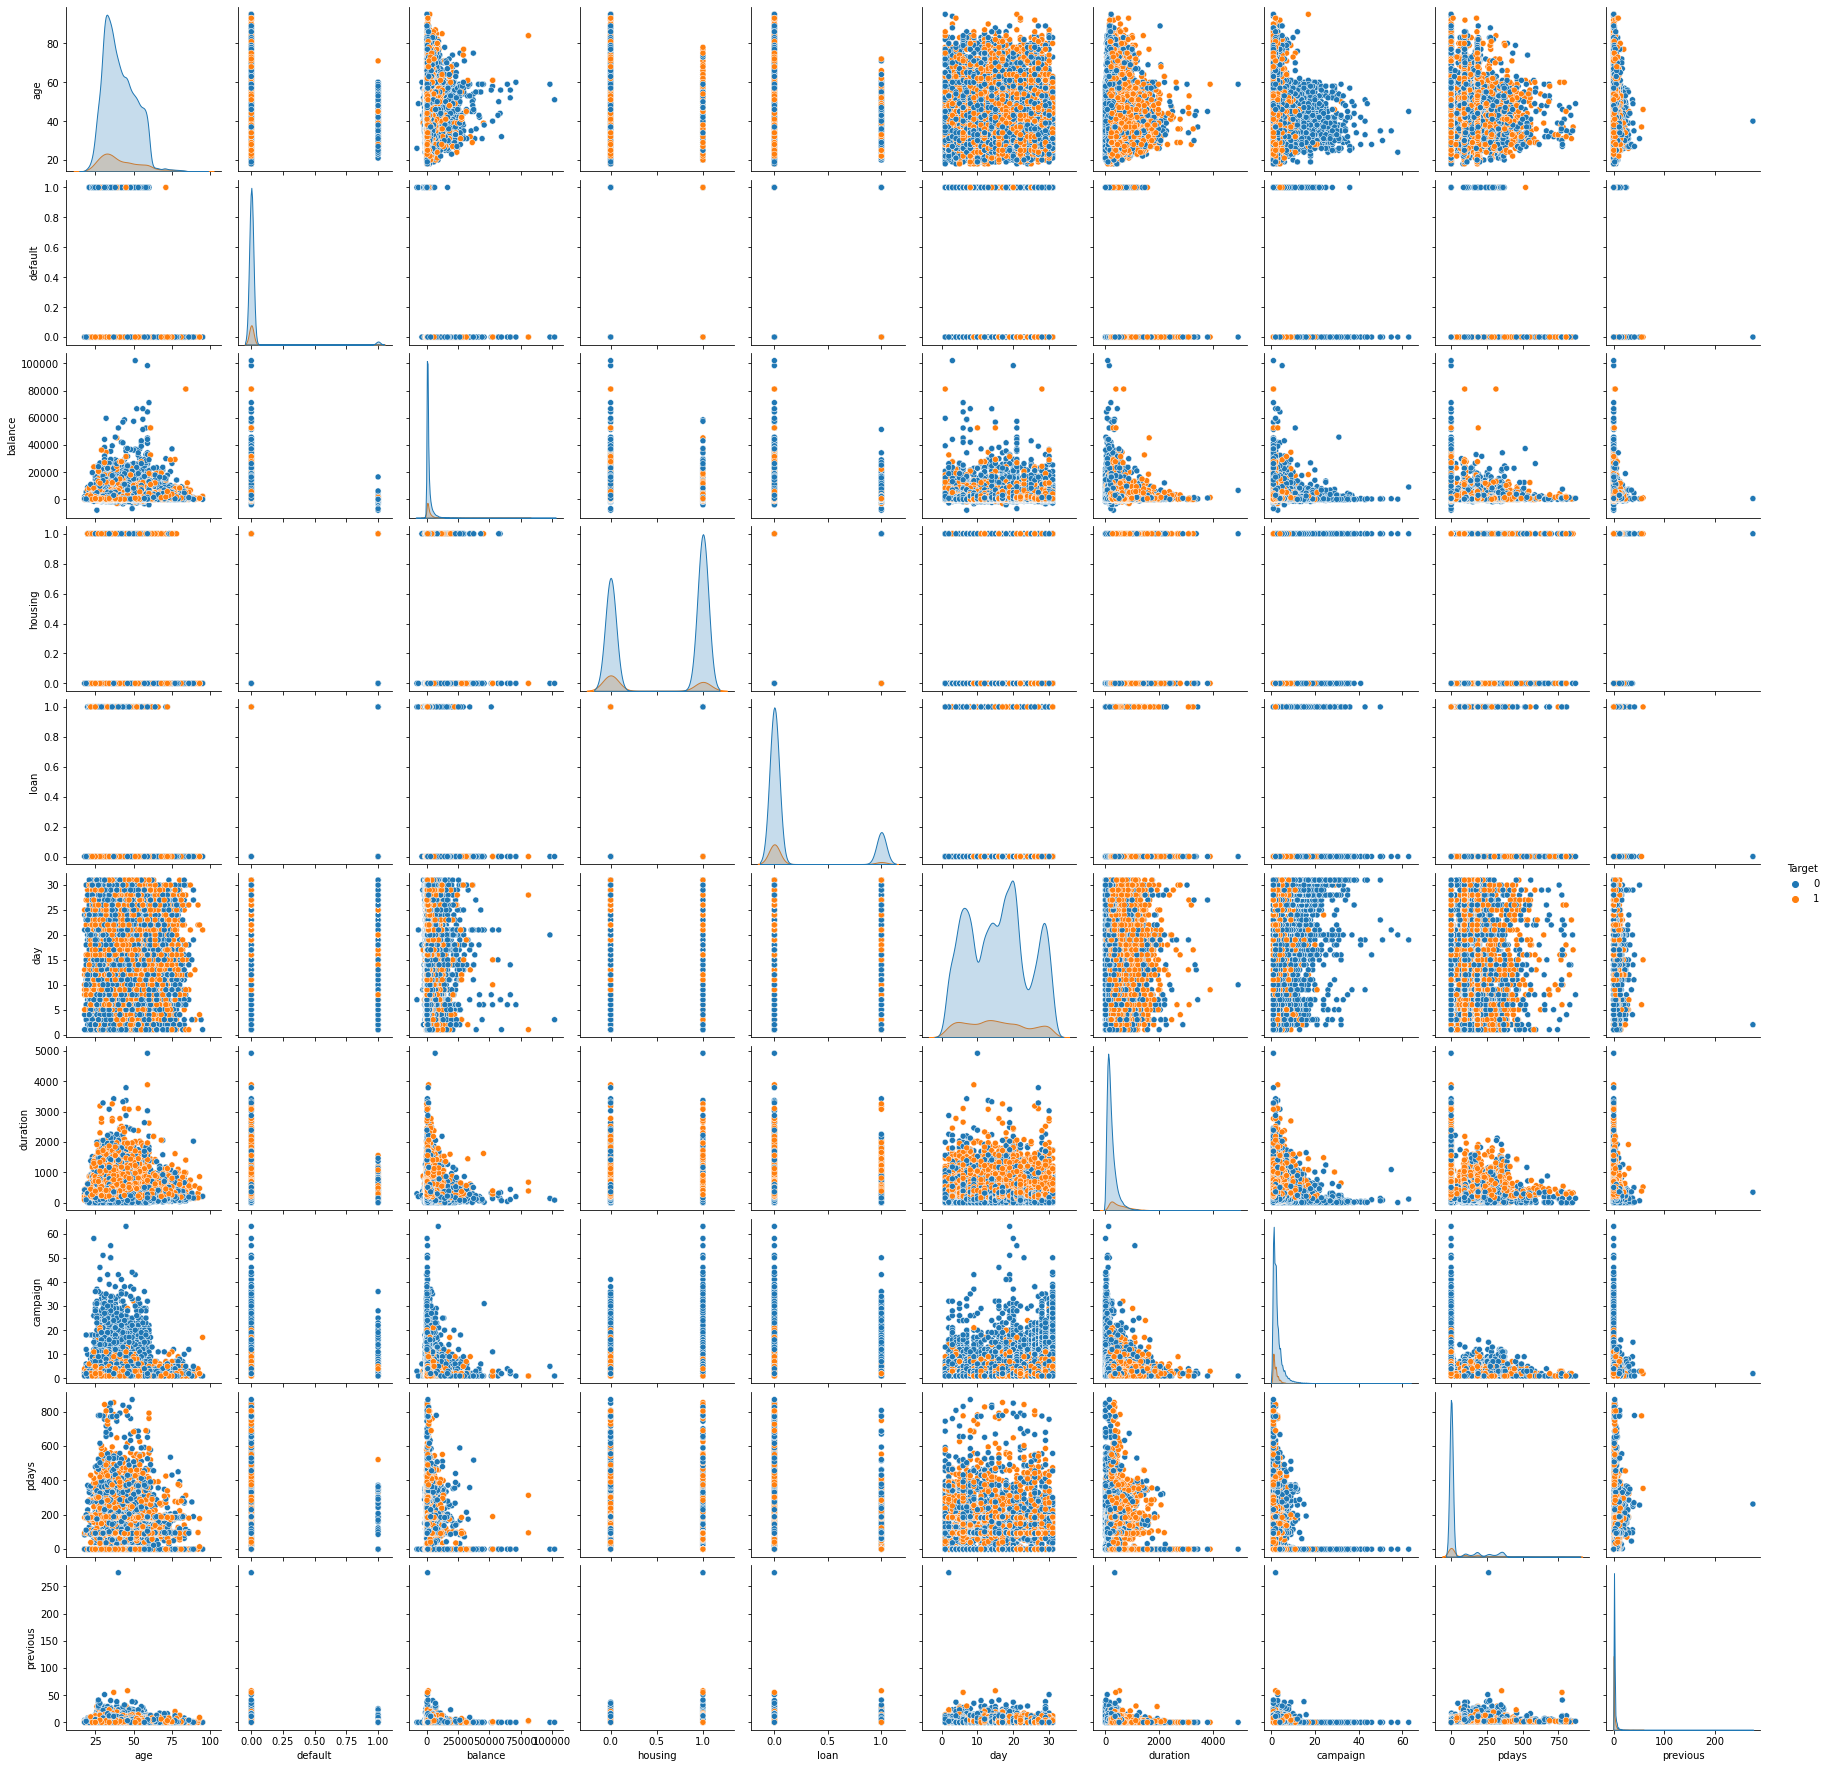

In [54]:
sns.pairplot(bank_df, hue="Target")

## i. Check correlation among independent features and mention if there is any collinearity. (2 marks)

In [55]:
bank_df.corr()

age   default   balance   housing      loan       day  \
age       1.000000 -0.017879  0.097783 -0.185513 -0.015655 -0.009120   
default  -0.017879  1.000000 -0.066745 -0.006025  0.077234  0.009424   
balance   0.097783 -0.066745  1.000000 -0.068768 -0.084350  0.004503   
housing  -0.185513 -0.006025 -0.068768  1.000000  0.041323 -0.027982   
loan     -0.015655  0.077234 -0.084350  0.041323  1.000000  0.011370   
day      -0.009120  0.009424  0.004503 -0.027982  0.011370  1.000000   
duration -0.004648 -0.010021  0.021560  0.005075 -0.012412 -0.030206   
campaign  0.004760  0.016822 -0.014578 -0.023599  0.009980  0.162490   
pdays    -0.023758 -0.029979  0.003435  0.124178 -0.022754 -0.093044   
previous  0.001288 -0.018329  0.016674  0.037076 -0.011043 -0.051710   
Target    0.025155 -0.022419  0.052838 -0.139173 -0.068185 -0.028348   

          duration  campaign     pdays  previous    Target  
age      -0.004648  0.004760 -0.023758  0.001288  0.025155  
default  -0.010021  0.016822 -0.029979 -0.018329 -0.022419  
balance   0.021560 -0.014578  0.003435  0.016674  0.052838  
housing   0.005075 -0.023599  0.124178  0.037076 -0.139173  
loan     -0.012412  0.009980 -0.022754 -0.011043 -0.068185  
day      -0.030206  0.162490 -0.093044 -0.051710 -0.028348  
duration  1.000000 -0.084570 -0.001565  0.001203  0.394521  
campaign -0.084570  1.000000 -0.088628 -0.032855 -0.073172  
pdays    -0.001565 -0.088628  1.000000  0.454820  0.103621  
previous  0.001203 -0.032855  0.454820  1.000000  0.093236  
Target    0.394521 -0.073172  0.103621  0.093236  1.000000

## 3. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc. (3 marks)

In [61]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

In [62]:
temp_dict = {'age':'category','job':'category','marital':'category','education':'category','default':'category','balance':'float64','housing':'category','loan':'category','contact':'category','day':'category','month':'category','duration':'float64','campaign':'float64','pdays':'float64','previous':'float64','poutcome':'category','Target':'category'}
bank_outlier_treat = bank_df.copy()
bank_outlier_treat = bank_outlier_treat.astype(temp_dict)
#bank_outlier_treat[(np.abs(stats.zscore(bank_outlier_treat)) < 3).all(axis=1)]
drop_numerical_outliers(bank_outlier_treat, 3)

In [63]:
bank_outlier_treat.shape

(40555, 17)

In [64]:
bank_outlier_treat.head(10)

age           job   marital  education default  balance housing loan  \
0  58    management   married   tertiary       0   2143.0       1    0   
1  44    technician    single  secondary       0     29.0       1    0   
2  33  entrepreneur   married  secondary       0      2.0       1    1   
3  47   blue-collar   married    unknown       0   1506.0       1    0   
4  33       unknown    single    unknown       0      1.0       0    0   
5  35    management   married   tertiary       0    231.0       1    0   
6  28    management    single   tertiary       0    447.0       1    1   
7  42  entrepreneur  divorced   tertiary       1      2.0       1    0   
8  58       retired   married    primary       0    121.0       1    0   
9  43    technician    single  secondary       0    593.0       1    0   

   contact day month  duration  campaign  pdays  previous poutcome Target  
0  unknown   5   may     261.0       1.0   -1.0       0.0  unknown      0  
1  unknown   5   may     151.0       1.0   -1.0       0.0  unknown      0  
2  unknown   5   may      76.0       1.0   -1.0       0.0  unknown      0  
3  unknown   5   may      92.0       1.0   -1.0       0.0  unknown      0  
4  unknown   5   may     198.0       1.0   -1.0       0.0  unknown      0  
5  unknown   5   may     139.0       1.0   -1.0       0.0  unknown      0  
6  unknown   5   may     217.0       1.0   -1.0       0.0  unknown      0  
7  unknown   5   may     380.0       1.0   -1.0       0.0  unknown      0  
8  unknown   5   may      50.0       1.0   -1.0       0.0  unknown      0  
9  unknown   5   may      55.0       1.0   -1.0       0.0  unknown      0

<AxesSubplot:>

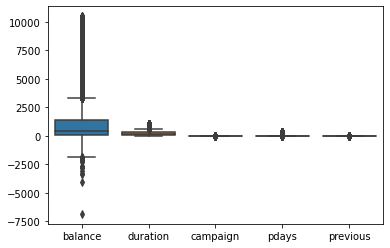

In [68]:
sns.boxplot(data=bank_outlier_treat[bank_df_num_cols])

In [69]:
type_dict = {'age':'float64','job':'category','marital':'category','education':'category','default':'float64','balance':'float64','housing':'float64','loan':'float64','contact':'category','day':'category','month':'category','duration':'float64','campaign':'float64','pdays':'float64','previous':'float64','poutcome':'category','Target':'float64'}
bank_outlier_treat = bank_outlier_treat.astype(dtype=type_dict)

In [70]:
bank_outlier_treat.dtypes

age           float64
job          category
marital      category
education    category
default       float64
balance       float64
housing       float64
loan          float64
contact      category
day          category
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
Target        float64
dtype: object

In [71]:
bank_df_conv = bank_outlier_treat.copy()

In [72]:
bank_df_conv.dtypes

age           float64
job          category
marital      category
education    category
default       float64
balance       float64
housing       float64
loan          float64
contact      category
day          category
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
Target        float64
dtype: object

In [73]:
bank_df_conv.head(10)

age           job   marital  education  default  balance  housing  loan  \
0  58.0    management   married   tertiary      0.0   2143.0      1.0   0.0   
1  44.0    technician    single  secondary      0.0     29.0      1.0   0.0   
2  33.0  entrepreneur   married  secondary      0.0      2.0      1.0   1.0   
3  47.0   blue-collar   married    unknown      0.0   1506.0      1.0   0.0   
4  33.0       unknown    single    unknown      0.0      1.0      0.0   0.0   
5  35.0    management   married   tertiary      0.0    231.0      1.0   0.0   
6  28.0    management    single   tertiary      0.0    447.0      1.0   1.0   
7  42.0  entrepreneur  divorced   tertiary      1.0      2.0      1.0   0.0   
8  58.0       retired   married    primary      0.0    121.0      1.0   0.0   
9  43.0    technician    single  secondary      0.0    593.0      1.0   0.0   

   contact day month  duration  campaign  pdays  previous poutcome  Target  
0  unknown   5   may     261.0       1.0   -1.0       0.0  unknown     0.0  
1  unknown   5   may     151.0       1.0   -1.0       0.0  unknown     0.0  
2  unknown   5   may      76.0       1.0   -1.0       0.0  unknown     0.0  
3  unknown   5   may      92.0       1.0   -1.0       0.0  unknown     0.0  
4  unknown   5   may     198.0       1.0   -1.0       0.0  unknown     0.0  
5  unknown   5   may     139.0       1.0   -1.0       0.0  unknown     0.0  
6  unknown   5   may     217.0       1.0   -1.0       0.0  unknown     0.0  
7  unknown   5   may     380.0       1.0   -1.0       0.0  unknown     0.0  
8  unknown   5   may      50.0       1.0   -1.0       0.0  unknown     0.0  
9  unknown   5   may      55.0       1.0   -1.0       0.0  unknown     0.0

In [74]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [75]:
bank_df_conv_encoded = dummyEncode(bank_df_conv)
bank_df_conv_encoded.head(10)

age  job  marital  education  default  balance  housing  loan  contact  \
0  58.0    4        1          2      0.0   2143.0      1.0   0.0        2   
1  44.0    9        2          1      0.0     29.0      1.0   0.0        2   
2  33.0    2        1          1      0.0      2.0      1.0   1.0        2   
3  47.0    1        1          3      0.0   1506.0      1.0   0.0        2   
4  33.0   11        2          3      0.0      1.0      0.0   0.0        2   
5  35.0    4        1          2      0.0    231.0      1.0   0.0        2   
6  28.0    4        2          2      0.0    447.0      1.0   1.0        2   
7  42.0    2        0          2      1.0      2.0      1.0   0.0        2   
8  58.0    5        1          0      0.0    121.0      1.0   0.0        2   
9  43.0    9        2          1      0.0    593.0      1.0   0.0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    4      8     261.0       1.0   -1.0       0.0         3     0.0  
1    4      8     151.0       1.0   -1.0       0.0         3     0.0  
2    4      8      76.0       1.0   -1.0       0.0         3     0.0  
3    4      8      92.0       1.0   -1.0       0.0         3     0.0  
4    4      8     198.0       1.0   -1.0       0.0         3     0.0  
5    4      8     139.0       1.0   -1.0       0.0         3     0.0  
6    4      8     217.0       1.0   -1.0       0.0         3     0.0  
7    4      8     380.0       1.0   -1.0       0.0         3     0.0  
8    4      8      50.0       1.0   -1.0       0.0         3     0.0  
9    4      8      55.0       1.0   -1.0       0.0         3     0.0

In [76]:
bank_df_conv_encoded.dtypes

age          float64
job            int32
marital        int32
education      int32
default      float64
balance      float64
housing      float64
loan         float64
contact        int32
day            int64
month          int32
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome       int32
Target       float64
dtype: object

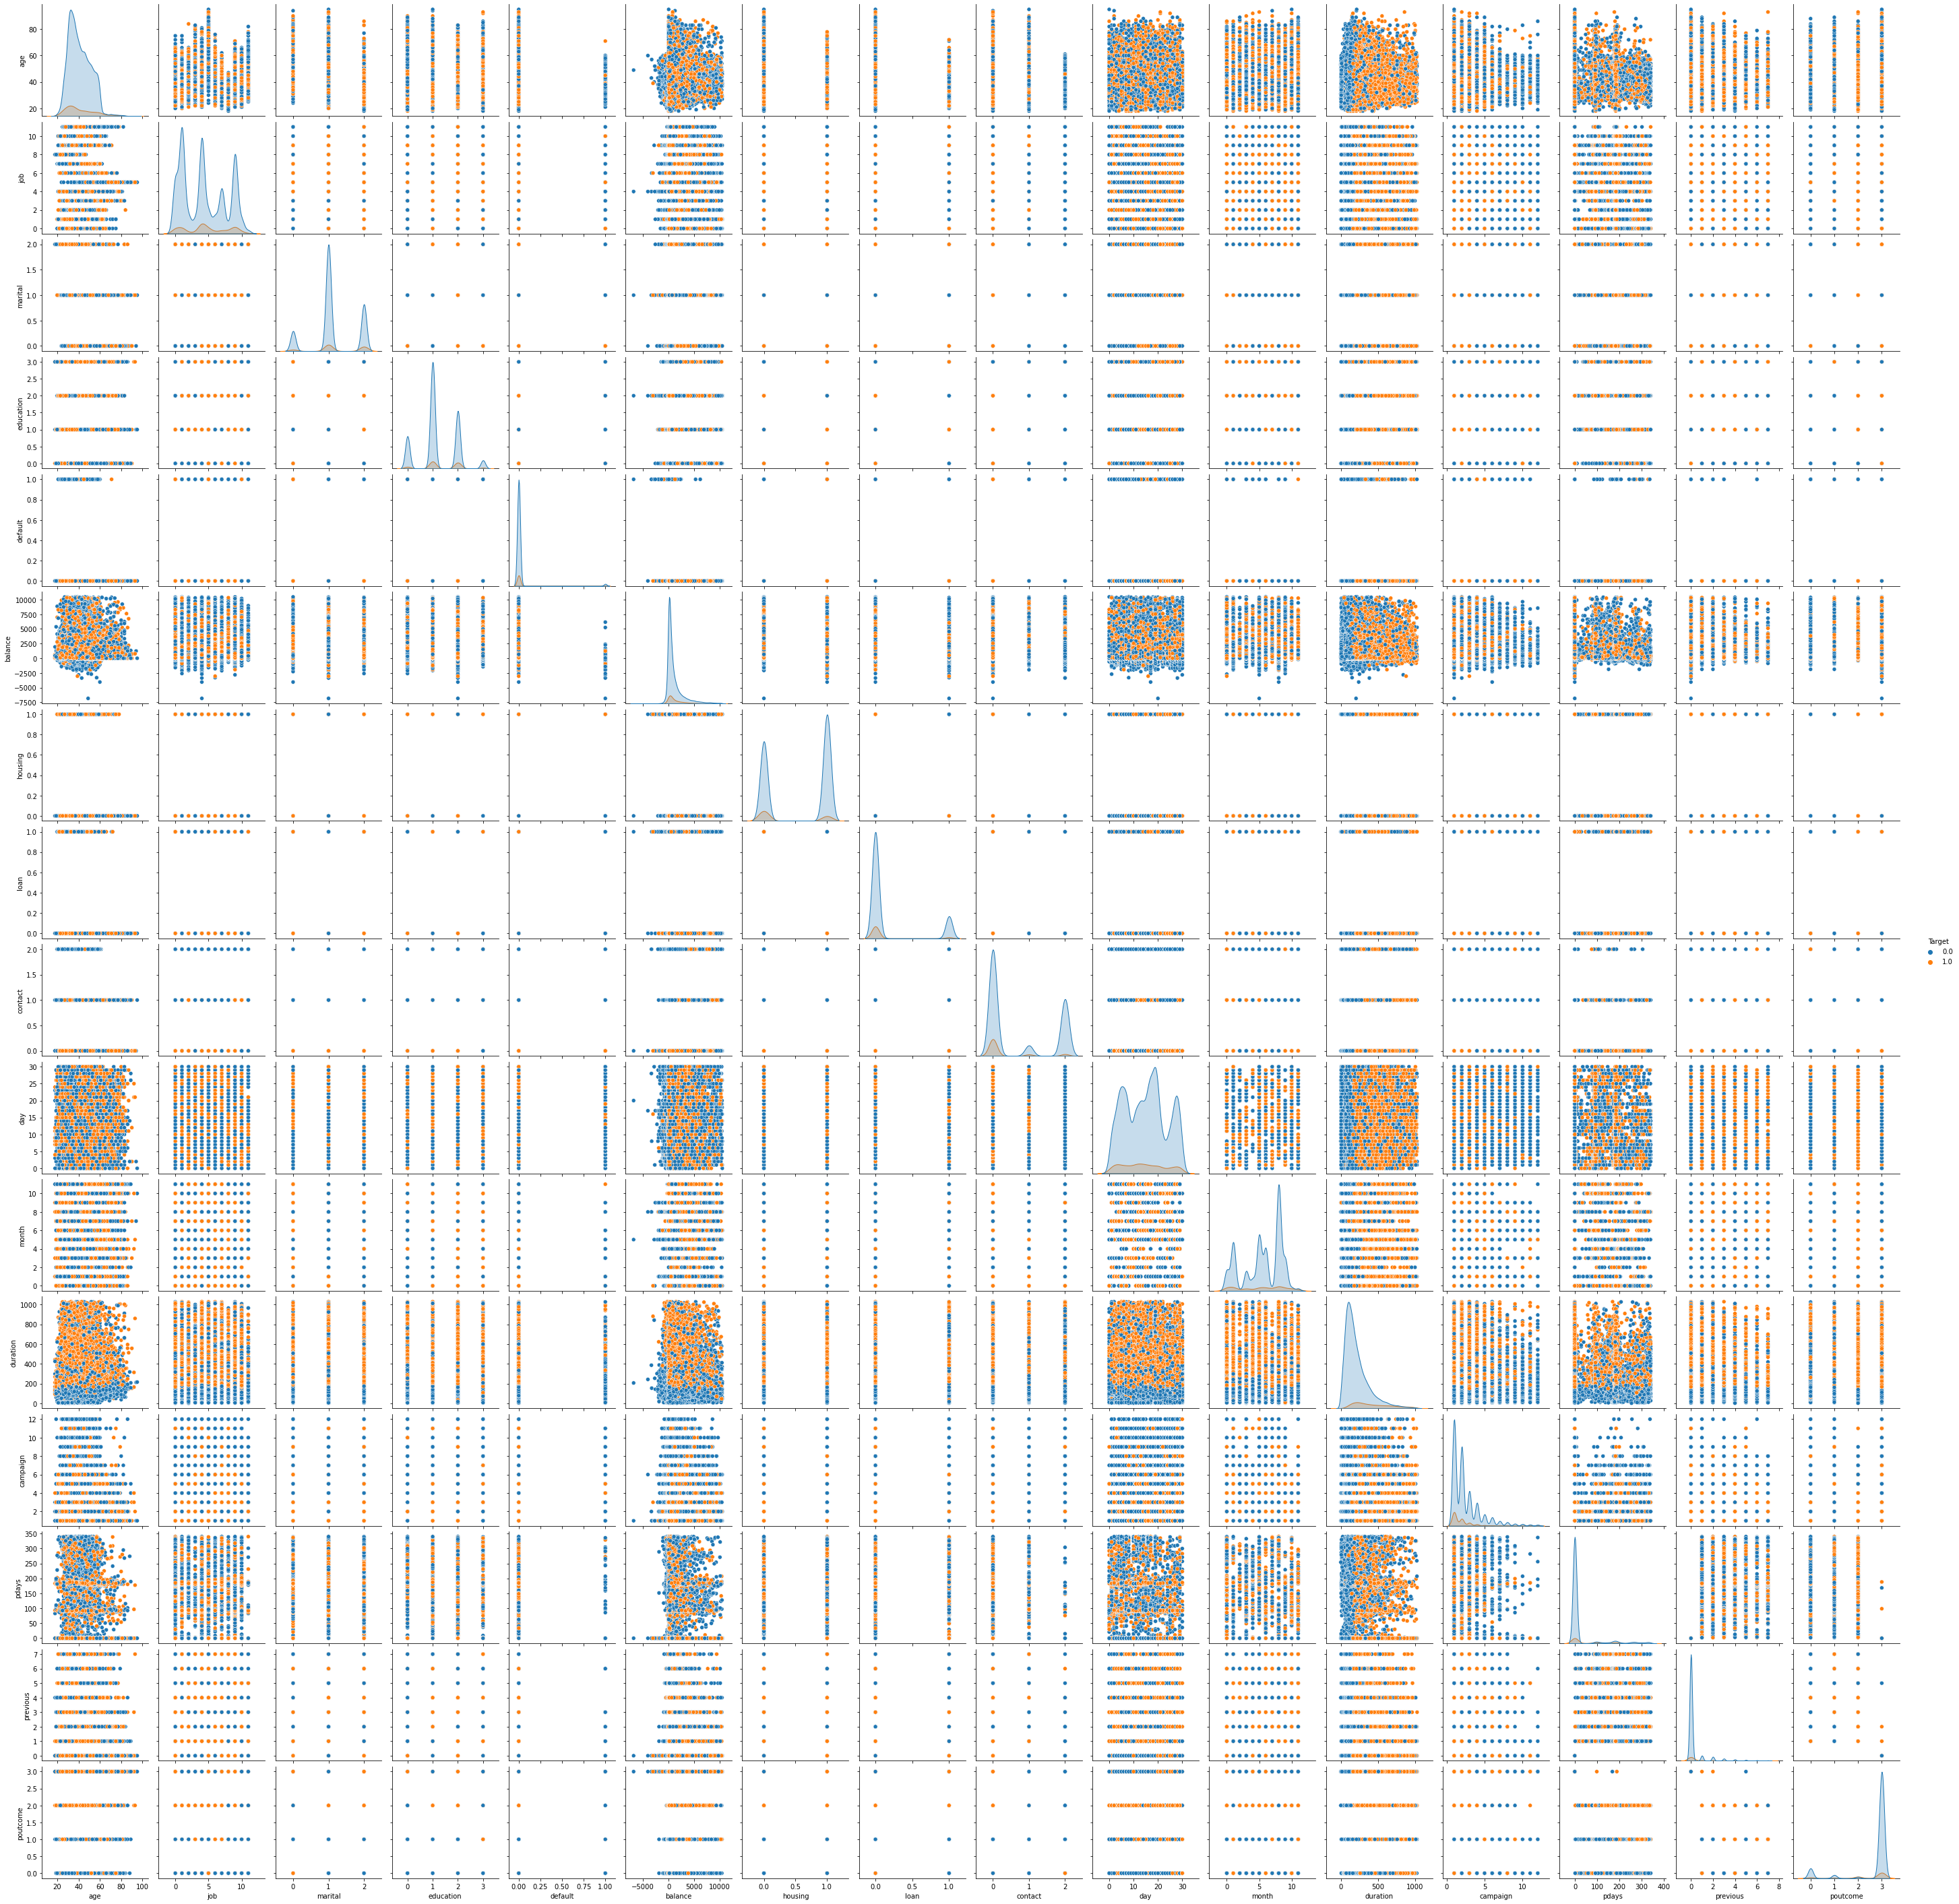

In [77]:
sns.pairplot(bank_df_conv_encoded, hue="Target")

## 4.Train a decision tree model, note and comment on their performances across different classification metrics. (5 marks)

In [78]:
## Define X and y variables
X = bank_df_conv_encoded.drop('Target', axis=1)
y = bank_df_conv_encoded[['Target']]
y=y.astype('int64')

##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [80]:
pred_train = dt_model.predict(X_train)
pred_test = dt_model.predict(X_test)

In [81]:
#training score
dt_model.score(X_train , y_train)

1.0

In [82]:
#Testing score
dt_model.score(X_test , y_test)

0.8858387441439961

In [83]:
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[25452     0]
 [    0  2936]]


In [87]:
print("Decision Tree MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Decision Tree MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     10899
           1       0.45      0.47      0.46      1268

    accuracy                           0.89     12167
   macro avg       0.70      0.70      0.70     12167
weighted avg       0.89      0.89      0.89     12167



In [85]:
print ("Feature importance = \n", pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

Feature importance = 
                 Imp
age        0.099362
job        0.046373
marital    0.017656
education  0.022258
default    0.000878
balance    0.118906
housing    0.029957
loan       0.009288
contact    0.041886
day        0.091216
month      0.108650
duration   0.263430
campaign   0.027033
pdays      0.067398
previous   0.008922
poutcome   0.046786


###### Decision Tree performed very well to predict the target column 

## 5. Build the ensemble models (random forest, bagging classifier, Adaboosting, and gradient boosting, and stacking classifier) and compare the results. (15 marks)

## Random Forest 

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight="balanced", max_depth = 20, min_samples_leaf=3)
rfcl = rfcl.fit(X_train, y_train.values.ravel())
pred_train = rfcl.predict(X_train)
pred_test= rfcl.predict(X_test)

In [89]:
#training score
rfcl.score(X_train , y_train)

0.9709031985345921

In [90]:
#Testing Score
rfcl.score(X_test , y_test)

0.9067970740527657

In [91]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[24662   790]
 [   36  2900]]


In [93]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[10262   637]
 [  497   771]]


In [94]:
print("Random Forest MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Random Forest MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     10899
           1       0.55      0.61      0.58      1268

    accuracy                           0.91     12167
   macro avg       0.75      0.77      0.76     12167
weighted avg       0.91      0.91      0.91     12167



## Adaboost

In [95]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train.values.ravel())
pred_train = abcl.predict(X_train)
pred_test = abcl.predict(X_test)

In [96]:
#5training score
abcl.score(X_train , y_train)

0.9029167253769198

In [98]:
#Testing score
abcl.score(X_test , y_test)

0.9030163557162817

In [99]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[24797   655]
 [ 2101   835]]


In [100]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[10626   273]
 [  907   361]]


In [102]:
print("AdaBoost MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

AdaBoost MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     10899
           1       0.57      0.28      0.38      1268

    accuracy                           0.90     12167
   macro avg       0.75      0.63      0.66     12167
weighted avg       0.88      0.90      0.89     12167



## GradientBoost

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train.values.ravel())
pred_train = gbcl.predict(X_train)
pred_test = gbcl.predict(X_test)
#gbcl.score(X_test , y_test)

In [105]:
#5training score
gbcl.score(X_train , y_train)

0.9083063266168804

In [106]:
#Testing score
gbcl.score(X_test , y_test)

0.9074545902851977

In [107]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[25277   175]
 [ 2428   508]]


In [108]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[10816    83]
 [ 1043   225]]


In [109]:
print("Gradient Boost MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Gradient Boost MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10899
           1       0.73      0.18      0.29      1268

    accuracy                           0.91     12167
   macro avg       0.82      0.58      0.62     12167
weighted avg       0.89      0.91      0.88     12167



## Bagging

In [111]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .6, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train.values.ravel())
pred_train = bgcl.predict(X_train)
pred_test = bgcl.predict(X_test)
#bgcl.score(X_test , y_test)

In [112]:
#5training score
bgcl.score(X_train , y_train)

0.9729110891926166

In [113]:
#Testing score
bgcl.score(X_test , y_test)

0.9046601462973617

In [114]:
# Training confusion Matrxix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[25347   105]
 [  664  2272]]


In [115]:
#Testing Confusion Matrix
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[10578   321]
 [  839   429]]


In [116]:
print("Bagging MODEL Metrics = \n", metrics.classification_report(y_test, pred_test))

Bagging MODEL Metrics = 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10899
           1       0.57      0.34      0.43      1268

    accuracy                           0.90     12167
   macro avg       0.75      0.65      0.69     12167
weighted avg       0.89      0.90      0.89     12167



## 6. Compare performances of all the models and comment on your findings. (5 marks)

 |Model Name         | Training Accuracy | Testing Accuracy | precision   | recall      | f1 Score    | support    |
 |------------------ | ----------------- | ---------------- | ----------- | ----------- | ----------- | ---------- |
 |DecisionTree        |1.0|0.8872|0.46|0.47|0.47|1268                                                              |
 |Random Forest          |0.9601|0.8962|0.50|0.58|0.54|1268                                                        |
 |Adaboost              |0.9029|0.9030|0.57|0.28|0.38|1268                                                         |
 |Gradient Boost        |0.9083|0.9074|0.73|0.18|0.29|1268                                                         |
 |Bagging             |0.9728|0.9081|0.61|0.34|0.43|1268                                                           |

1. Bagging have more training anf testing accuracy 
2. class skew seems to affect learning and messes it up
3. Training & accuracies are very high but precision recall f1 for target class 1 is not very satisfactory